In [1]:
import os
import random
from shutil import copyfile
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

print("Setup Complete!")

Setup Complete!


In [2]:
Data_DIR = "Data/"

train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                          rotation_range=20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest',
                                           validation_split=0.2
                                  )


train_generator = train_datagen.flow_from_directory(Data_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(60, 40),
                                                   subset='training')

validation_datagen = ImageDataGenerator(rescale = 1.0/255,
                                        validation_split=0.2)


validation_generator = validation_datagen.flow_from_directory(Data_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(60, 40),
                                                    subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [8]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), activation=tf.nn.relu,input_shape=(60, 40, 3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu,padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu,padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation = tf.nn.softmax)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 56, 36, 64)        4864      
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 36, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 18, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 18, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 9, 128)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16128)            

In [4]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.000003)

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])

history = model.fit(train_generator,
                    epochs = 25,
                    verbose = 1,
                   validation_data = validation_generator,
                   callbacks=[learning_rate_reduction])

Epoch 1/25
55/55 [==============================] - 5s 87ms/step - loss: 1.4033 - acc: 0.4375 - val_loss: 1.0616 - val_acc: 0.3364
Epoch 2/25
55/55 [==============================] - 5s 90ms/step - loss: 0.8070 - acc: 0.6545 - val_loss: 0.8661 - val_acc: 0.8970
Epoch 3/25
55/55 [==============================] - 5s 93ms/step - loss: 0.5350 - acc: 0.8035 - val_loss: 0.7379 - val_acc: 0.9039
Epoch 4/25
55/55 [==============================] - 5s 88ms/step - loss: 0.3852 - acc: 0.8607 - val_loss: 0.6180 - val_acc: 0.8604
Epoch 5/25
55/55 [==============================] - ETA: 0s - loss: 0.2924 - acc: 0.8898
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
55/55 [==============================] - 5s 94ms/step - loss: 0.2924 - acc: 0.8898 - val_loss: 0.5076 - val_acc: 0.8764
Epoch 6/25
55/55 [==============================] - 5s 88ms/step - loss: 0.1553 - acc: 0.9532 - val_loss: 0.3478 - val_acc: 0.9085
Epoch 7/25
55/55 [==============================] - 5s 9

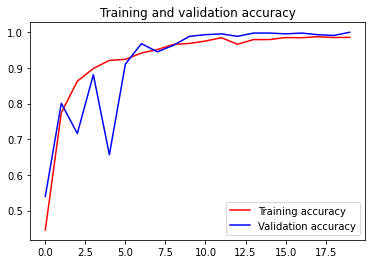

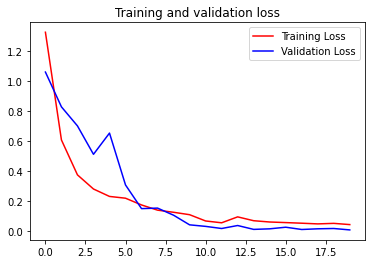

In [6]:
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



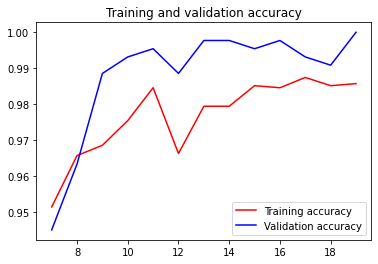

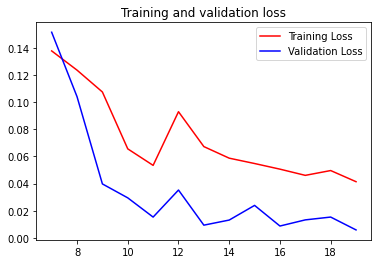

In [7]:
%matplotlib inline
acc = history.history['acc'][7:]
val_acc = history.history['val_acc'][7:]
loss = history.history['loss'][7:]
val_loss = history.history['val_loss'][7:]

epochs = range(7,7+len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()